In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
rbp31_intersections_log2fc = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_intersections_log2fc.tsv", index_col=0, header=0, delimiter="\t")
rbp31_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_baseline_results.tsv", index_col=0, header=0, delimiter="\t")
rbp31_deep_embed_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results.tsv", header=0, delimiter="\t")

rbp31_intersections_log2fc = rbp31_intersections_log2fc.sort_values(by="Name").reset_index(drop=True)
rbp31_baseline_results = rbp31_baseline_results[rbp31_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name"})
rbp31_deep_embed_results = rbp31_deep_embed_results.sort_values(by="Name").reset_index(drop=True)

rbp31_df = rbp31_intersections_log2fc.merge(rbp31_baseline_results, on="Name")
rbp31_df = rbp31_df.merge(rbp31_deep_embed_results, on="Name")
rbp31_df = rbp31_df.drop(columns=["DataType", "TestACC"]).rename(columns={"TestAUC":"BaseAUC", "AUC":"DeepAUC"})

In [11]:
import math
import numpy as np
rbp31_df["GC"] = rbp31_df.PosGC / rbp31_df.NegGC
rbp31_df["GC"] = rbp31_df["GC"].apply(lambda x: math.log2(x))

rbp31_df = rbp31_df.drop(columns=["PosGC", "NegGC"]).replace(np.inf, np.nan).rename(columns={"5utr":"utr5", "3utr":"utr3"})
rbp31_df

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,FP,FP_GC,FN,FN_GC,GC
0,CLIPSEQ_AGO2,0.381296,-0.296217,0.368471,-1.853578,0.301404,0.599585,0.604751,3473,37.742496,728,52.673206,-0.153350
1,CLIPSEQ_ELAVL1,2.680986,0.936411,-0.424406,-3.646822,0.949664,0.829294,0.814332,1270,32.872170,432,42.315900,-0.477559
2,CLIPSEQ_SFRS1,0.779643,-1.883359,-1.402347,0.054270,3.474197,0.619132,0.739497,2496,54.166980,418,47.510467,0.167214
3,CLIPSEQ_elF4AIII_1,0.787379,-2.055242,-0.790991,0.758127,3.732385,0.530914,0.788264,1251,45.574790,531,47.743056,-0.016404
4,CLIPSEQ_elF4AIII_2,0.817481,-2.114247,-0.596935,1.039656,3.685891,0.559953,0.782592,1630,47.067676,467,46.993777,0.004843
5,HITSCLIP_AGO_binding_clusters,1.293234,-1.824411,-0.477047,-2.249591,1.982767,0.624045,0.734652,2573,40.718519,422,46.732450,-0.226205
6,HITSCLIP_AGO_binding_clusters_2,1.268343,-1.849392,-0.509395,-2.148536,2.030374,0.634305,0.735238,2411,39.438705,462,46.043019,-0.214141
7,ICLIP_HNRNPC,-0.221379,3.991083,1.791053,0.094792,-0.784998,0.905476,0.888420,670,38.603078,283,37.905808,-0.246867
8,ICLIP_NSUN2_293,0.986311,-1.682657,-1.385709,-1.412727,1.655034,0.789482,0.726884,2264,59.033721,527,45.580823,0.305928
9,ICLIP_TDP43,-0.247572,3.363822,2.109122,0.573629,-0.620430,0.686341,0.822956,779,40.331154,511,40.933831,-0.153240


In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaled_rbp31_df = rbp31_df.copy()
data = scaled_rbp31_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]]
scaler = StandardScaler()
scaler.fit(data)
scaled_rbp31_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]] = scaler.transform(data)
scaled_rbp31_df

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,FP,FP_GC,FN,FN_GC,GC
0,CLIPSEQ_AGO2,-0.635389,-0.163900,0.575866,-0.119318,-0.837601,0.599585,0.604751,3473,37.742496,728,52.673206,0.476033
1,CLIPSEQ_ELAVL1,2.385387,0.547239,-0.356920,-1.380721,-0.256510,0.829294,0.814332,1270,32.872170,432,42.315900,-1.092323
2,CLIPSEQ_SFRS1,-0.112137,-1.079569,-1.507427,1.222698,2.006442,0.619132,0.739497,2496,54.166980,418,47.510467,2.026756
3,CLIPSEQ_elF4AIII_1,-0.101976,-1.178733,-0.788193,1.717805,2.237878,0.530914,0.788264,1251,45.574790,531,47.743056,1.138504
4,CLIPSEQ_elF4AIII_2,-0.062435,-1.212775,-0.559894,1.915838,2.196202,0.559953,0.782592,1630,47.067676,467,46.993777,1.241287
5,HITSCLIP_AGO_binding_clusters,0.562494,-1.045560,-0.418851,-0.397882,0.669547,0.624045,0.734652,2573,40.718519,422,46.732450,0.123597
6,HITSCLIP_AGO_binding_clusters_2,0.529799,-1.059972,-0.456906,-0.326797,0.712221,0.634305,0.735238,2411,39.438705,462,46.043019,0.181959
7,ICLIP_HNRNPC,-1.427038,2.309567,2.249474,1.251203,-1.811435,0.905476,0.888420,670,38.603078,283,37.905808,0.023645
8,ICLIP_NSUN2_293,0.159334,-0.963778,-1.487853,0.190784,0.375772,0.789482,0.726884,2264,59.033721,527,45.580823,2.697781
9,ICLIP_TDP43,-1.461444,1.947682,2.623669,1.588026,-1.663919,0.686341,0.822956,779,40.331154,511,40.933831,0.476562


In [16]:
import plotly.express as px

fig = px.scatter(scaled_rbp31_df, 
                 x=[scaled_rbp31_df.intron, scaled_rbp31_df.exon, scaled_rbp31_df.utr5, scaled_rbp31_df.utr3],  
                 y=scaled_rbp31_df.BaseAUC,
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Absolute Delta GC"},
                 title="GC content influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.show()

In [23]:
fig = px.scatter(rbp31_df, 
                 x=rbp31_df.BaseAUC,  
                 y=rbp31_df.DeepAUC, 
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Baseline AUC", "y": "Deep model AUC"},
                 title="AUC comparison",
                 range_x=[0.5,1],
                 range_y=[0.5,1],
                 width=1400, height=800)
fig.show()

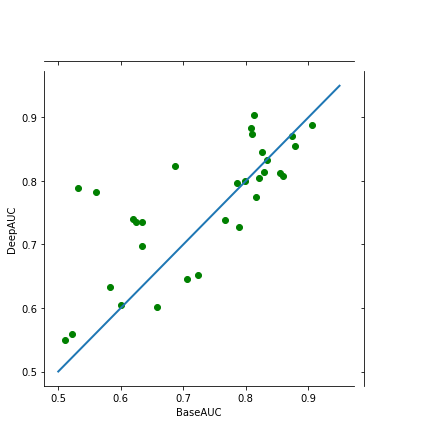

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
  
grid = sns.JointGrid(x = rbp31_df.BaseAUC, y = rbp31_df.DeepAUC)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0.95, 0.5], [0.95, 0.5], linewidth=2)

In [18]:
bad_performance = scaled_rbp31_df[scaled_rbp31_df.BaseAUC >= scaled_rbp31_df.DeepAUC].reset_index(drop=True)
good_performance = scaled_rbp31_df[scaled_rbp31_df.BaseAUC < scaled_rbp31_df.DeepAUC].reset_index(drop=True)

In [19]:
fig = px.scatter(bad_performance, 
                 x=[bad_performance.exon, bad_performance.repeats, bad_performance.GC],  
                 y=bad_performance.DeepAUC, 
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Absolute Delta GC"},
                 title="GC content influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.show()

In [21]:
fig = px.scatter(bad_performance, 
                 x=[bad_performance.exon, bad_performance.repeats, bad_performance.GC],  
                 y=bad_performance.BaseAUC, 
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Absolute Delta GC"},
                 title="GC content influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.show()

In [20]:
fig = px.scatter(good_performance, 
                 x=[good_performance.exon, good_performance.repeats, good_performance.GC],  
                 y=good_performance.DeepAUC, 
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Absolute Delta GC"},
                 title="GC content influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.show()

In [22]:
fig = px.scatter(good_performance, 
                 x=[good_performance.exon, good_performance.repeats, good_performance.GC],  
                 y=good_performance.BaseAUC, 
                 #color="DataType", 
                 hover_name="Name",
                 labels={"x": "Absolute Delta GC"},
                 title="GC content influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.show()